In [130]:
# Python 3.x Utility Functions
# From https://github.com/norvig/pytudes/blob/master/ipynb/Advent 2017.ipynb

import re
import numpy as np
import math
import random
import urllib.request

from collections import Counter, defaultdict, namedtuple, deque, abc, OrderedDict
from functools   import lru_cache
from itertools   import (permutations, combinations, chain, cycle, product, islice, 
                         takewhile, zip_longest, count as count_from)
from heapq       import heappop, heappush

identity = lambda x: x
letters  = 'abcdefghijklmnopqrstuvwxyz'

cat = ''.join

Ø   = frozenset() # Empty set
inf = float('inf')
BIG = 10 ** 999

In [3]:
#Read example
top = []
bottom = []
weight = {}

with open('example.txt') as f:
    for line in f:
        line = re.sub('\(|\)', '', line).split()
        if len(line) > 2:
            line[2] = [re.sub(',', '', x) for x in line[3:]]
            line = line[:3]
            bottom.append(line) 
        else:
            top.append(line)
            weight[line[0]] = int(line[1])
        print(line)
        

['pbga', '66']
['xhth', '57']
['ebii', '61']
['havc', '66']
['ktlj', '57']
['fwft', '72', ['ktlj', 'cntj', 'xhth']]
['qoyq', '66']
['padx', '45', ['pbga', 'havc', 'qoyq']]
['tknk', '41', ['ugml', 'padx', 'fwft']]
['jptl', '61']
['ugml', '68', ['gyxo', 'ebii', 'jptl']]
['gyxo', '61']
['cntj', '57']


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
G = nx.DiGraph()

In [6]:
G.add_nodes_from([x for x, y in top])
G.add_nodes_from([x for x, y, z in bottom])

In [7]:
edges = list(chain.from_iterable(list(list(product([x], z)) for x,y,z in bottom)))

In [8]:
G.add_edges_from(edges)

In [9]:
G.out_edges()

OutEdgeView([('fwft', 'ktlj'), ('fwft', 'cntj'), ('fwft', 'xhth'), ('padx', 'pbga'), ('padx', 'havc'), ('padx', 'qoyq'), ('tknk', 'ugml'), ('tknk', 'padx'), ('tknk', 'fwft'), ('ugml', 'gyxo'), ('ugml', 'ebii'), ('ugml', 'jptl')])

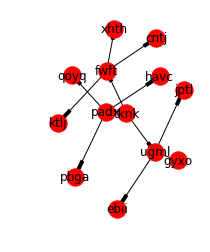

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(G, with_labels=True)


In [11]:
[(x, y) for x, y in G.in_degree if y == 0]

[('tknk', 0)]

In [12]:
#Read input.txt
top = []
bottom = []
weight = {}

with open('input.txt') as f:
    for line in f:
        line = re.sub('\(|\)', '', line).split()
        if len(line) > 2:
            line[2] = [re.sub(',', '', x) for x in line[3:]]
            line = line[:3]
            bottom.append(line) 
        else:
            top.append(line)
            weight[line[0]] = int(line[1])
        
        

In [13]:
G = nx.DiGraph()
G.add_nodes_from([x for x, y in top])
G.add_nodes_from([x for x, y, z in bottom])
edges = list(chain.from_iterable(list(list(product([x], z)) for x,y,z in bottom)))
G.add_edges_from(edges)

In [14]:
[(x, y) for x, y in G.in_degree if y == 0]

[('vvsvez', 0)]

## Part 2

In [97]:
#Read example
top = []
bottom = []
weight = {}
total_weight = {}

with open('input.txt') as f:
    for line in f:
        line = re.sub('\(|\)', '', line).split()
        if len(line) > 2:
            line[2] = [re.sub(',', '', x) for x in line[3:]]
            line = line[:3]
            bottom.append(line) 
        else:
            top.append(line)
        weight[line[0]] = int(line[1])
        print(line)
        
G = nx.DiGraph()
G.add_nodes_from([x for x, y in top], weight = 0)
G.add_nodes_from([x for x, y, z in bottom], weight = 0)
edges = list(chain.from_iterable(list(list(product([x], z)) for x,y,z in bottom)))
G.add_edges_from(edges)

['qgcmjz', '87', ['skzkx', 'pzkofch']]
['remwlv', '18']
['ngrmq', '80', ['cluej', 'ywrxbgi', 'saznyj']]
['omqech', '119', ['asqih', 'chotekn']]
['xekwze', '70']
['qzjln', '86', ['gstsuq', 'hwbzs']]
['hpltlm', '94']
['diwnw', '43']
['losei', '80']
['xkzbkz', '16']
['rzzcyrh', '7']
['xkkyybu', '7']
['gcricg', '135', ['oowec', 'vfsonrs', 'fcszioo']]
['ikkvv', '12']
['ugdngw', '79']
['dotrpsi', '42']
['xxemgkm', '34']
['zfcck', '18']
['haumg', '7']
['knlyr', '51']
['nzeiwlc', '51']
['cuoso', '35']
['diphdjt', '44']
['pcafsei', '61', ['aenhbm', 'urjmc', 'ckarib']]
['cnaxol', '35']
['ydsxmg', '40']
['kmybac', '1311', ['sjlax', 'cyvwqu', 'siiztl']]
['lpano', '18']
['idgqyfk', '12']
['fqxtra', '261', ['aclfkav', 'aaovpqz']]
['erqjic', '5']
['ikmaui', '13']
['myxnc', '14']
['imzgw', '120', ['gyprs', 'dxswnz', 'xxzms']]
['uckfdi', '25']
['fcphzy', '27']
['bnyaw', '30']
['iujsypy', '34']
['nrkpq', '96']
['iylhfc', '27']
['fkxei', '241']
['rmxzhgl', '39']
['xxwpir', '94']
['rfvjk', '49']
['zdkvsp'

In [98]:
#weight = {**{x: int(y) for x, y in top},**{x: int(y) for x, y, z in bottom}}

In [99]:
weight == {**{x: int(y) for x, y in top},**{x: int(y) for x, y, z in bottom}}

True

In [100]:
base = [x for x, y in G.in_degree if y == 0]

In [104]:
weight

{'qgcmjz': 87,
 'remwlv': 18,
 'ngrmq': 80,
 'omqech': 119,
 'xekwze': 70,
 'qzjln': 86,
 'hpltlm': 94,
 'diwnw': 43,
 'losei': 80,
 'xkzbkz': 16,
 'rzzcyrh': 7,
 'xkkyybu': 7,
 'gcricg': 135,
 'ikkvv': 12,
 'ugdngw': 79,
 'dotrpsi': 42,
 'xxemgkm': 34,
 'zfcck': 18,
 'haumg': 7,
 'knlyr': 51,
 'nzeiwlc': 51,
 'cuoso': 35,
 'diphdjt': 44,
 'pcafsei': 61,
 'cnaxol': 35,
 'ydsxmg': 40,
 'kmybac': 1311,
 'lpano': 18,
 'idgqyfk': 12,
 'fqxtra': 261,
 'erqjic': 5,
 'ikmaui': 13,
 'myxnc': 14,
 'imzgw': 120,
 'uckfdi': 25,
 'fcphzy': 27,
 'bnyaw': 30,
 'iujsypy': 34,
 'nrkpq': 96,
 'iylhfc': 27,
 'fkxei': 241,
 'rmxzhgl': 39,
 'xxwpir': 94,
 'rfvjk': 49,
 'zdkvsp': 65,
 'dqiievh': 63,
 'aivrgc': 50,
 'gvrkyb': 12,
 'seasb': 34,
 'qjnqrxg': 91,
 'zlunbf': 67,
 'rqpripo': 1383,
 'kutjx': 19,
 'wrntht': 12,
 'vjdkx': 90,
 'uzxcmdh': 7,
 'exlobhb': 80,
 'sxjxk': 21,
 'bebmszs': 75,
 'wvghqb': 60,
 'ieqcv': 245,
 'mupmhq': 77,
 'urvmk': 26,
 'zhmjupz': 1101,
 'udjtzas': 92,
 'nuxmb': 97,
 'zaqhiy

In [102]:
weight['ugml']

KeyError: 'ugml'

In [ ]:
def compare_children(start_point):
    children = [*G.successors(*start_point)]
    children_w = np.zeros(len(children))
    for child in children:
        weight[child] + 
        

In [ ]:
def get_children_w(parent):
    children = [*G.successors(*start_point)]
    tmp_w = 0
    if len(children) == 0:
        return weight[parent]
    else:
        for child in children:
            get_children_w(child)
        

In [203]:
nx.set_node_attributes(G, weight, 'weight')
nx.set_node_attributes(G, weight, 'totalweight')

In [204]:
G.node['ktlj']['weight']

57

In [43]:
np.array(2)

array(2)

In [44]:
endpoints = [x  for x, y in G.out_degree if y == 0]

In [182]:
nx.get_node_attributes(G, 'totalweight')

{'cntj': 57,
 'ebii': 61,
 'fwft': 72,
 'gyxo': 61,
 'havc': 66,
 'jptl': 61,
 'ktlj': 57,
 'padx': 45,
 'pbga': 66,
 'qoyq': 66,
 'tknk': 41,
 'ugml': 68,
 'xhth': 57}

In [63]:
[*G.successors('ugml')]

['gyxo', 'ebii', 'jptl']

In [75]:
[total_weight.update({x: weight[x]}) for x in endpoints]

[None, None, None, None, None, None, None, None, None]

In [73]:
total_weight

{'cntj': 57,
 'ebii': 61,
 'gyxo': 61,
 'havc': 66,
 'jptl': 61,
 'ktlj': 57,
 'pbga': 66,
 'qoyq': 66,
 'xhth': 57}

In [127]:
endpoints = [x  for x, y in G.out_degree if y == 0]
total_weight = {}
prevpoints = endpoints
middlepoints = []
kids_weight = 0
[total_weight.update({x: weight[x]}) for x in endpoints]
while True:
    middlepoints = set(y for x in prevpoints for y in G.predecessors(x))
    if len(middlepoints) == 0:
        break
    for node_middle in middlepoints:
        succ_list = [*G.successors(node_middle)]
        for succ in succ_list:
            kids_weight += total_weight[succ]
        total_weight.update({node_middle: kids_weight + weight[node_middle]})
        kids_weight = 0
    prevpoints = middlepoints   
    

KeyError: 'cwzgcb'

In [112]:
len(endpoints)


990

In [118]:
[x in endpoints for x in list(G.successors('ugnsbfr'))]




[True, False, False, False, False]

In [126]:
prevpoints = endpoints
middlepoints = []
kids_weight = 0
while True:
    middlepoints = set(chain.from_iterable([G.predecessors(x) for x in prevpoints]))
    if len(middlepoints) == 0:
        break
    for node_middle in middlepoints:
        succ_list = list(G.successors(node_middle))
        for succ in succ_list:
            current_kid_weight = G.node[succ]['totalweight']
            if kids_weight == 0:
                kids_weight = current_kid_weight
            else:
                if kids_weight != current_kid_weight:
                    print('Error:' + str(kids_weight - current_kid_weight))
                    break
            G.node[node_middle]['totalweight'] += current_kid_weight
        kids_weight = 0
    prevpoints = middlepoints   
    

Error:150
Error:140
Error:-60
Error:30
Error:225
Error:-21
Error:-42
Error:130
Error:-172
Error:117
Error:-88
Error:120
Error:-144
Error:68
Error:42
Error:-140
Error:-64
Error:153
Error:-188
Error:-106
Error:-152
Error:160
Error:-123
Error:148
Error:93
Error:150
Error:184
Error:927
Error:-165
Error:689
Error:222
Error:-104
Error:36
Error:2466
Error:-699
Error:554
Error:1165
Error:236
Error:480
Error:814
Error:388
Error:-188
Error:495
Error:-3494
Error:-70
Error:933
Error:-318
Error:-60
Error:1942
Error:-46
Error:-139
Error:-392
Error:-73
Error:873
Error:-30
Error:-2048
Error:8291
Error:-1766
Error:213
Error:-20
Error:-55
Error:-759
Error:244
Error:933
Error:852
Error:-1085
Error:-44
Error:-392
Error:-720
Error:1836
Error:7911
Error:-10323
Error:-73
Error:11478
Error:825
Error:234
Error:-398
Error:34
Error:-139
Error:873
Error:92
Error:1632
Error:-10323
Error:13853
Error:1895
Error:-1838
Error:7933
Error:3595
Error:3684
Error:27316


In [122]:
#Read input
top = []
bottom = []
weight = {}

with open('input.txt') as f:
    for line in f:
        line = re.sub('\(|\)', '', line).split()
        if len(line) > 2:
            line[2] = [re.sub(',', '', x) for x in line[3:]]
            line = line[:3]
            bottom.append(line) 
        else:
            top.append(line)
        weight[line[0]] = int(line[1])
        
G = nx.DiGraph()
G.add_nodes_from([x for x, y in top], weight = 0)
G.add_nodes_from([x for x, y, z in bottom], weight = 0)
edges = list(chain.from_iterable(list(list(product([x], z)) for x,y,z in bottom)))
G.add_edges_from(edges)

weight = {**{x: int(y) for x, y in top},**{x: int(y) for x, y, z in bottom}}
nx.set_node_attributes(G, weight, 'weight')
nx.set_node_attributes(G, weight, 'totalweight')

In [123]:
def buscanfat(Graph):
    endpoints = [x  for x, y in Graph.out_degree if y == 0]
    prevpoints = endpoints
    middlepoints = []
    kids_weight = 0
    while True:
        middlepoints = set(chain.from_iterable([Graph.predecessors(x) for x in prevpoints]))
        if len(middlepoints) == 0:
            return None
        for node_middle in middlepoints:
            succ_list = list(Graph.successors(node_middle))
            for succ in succ_list:
                current_kid_weight = Graph.node[succ]['totalweight']
                if kids_weight == 0:
                    kids_weight = current_kid_weight
                else:
                    if kids_weight != current_kid_weight:
                        print(node_middle)
                        print(kids_weight)
                        print(current_kid_weight)
                        exit = 'Error:' + str(kids_weight - current_kid_weight)
                        return exit
                Graph.node[node_middle]['totalweight'] += current_kid_weight
            kids_weight = 0
        prevpoints = middlepoints   
    

In [124]:
list(G.successors(list(set(chain.from_iterable([G.predecessors(x) for x in [x  for x, y in G.out_degree if y == 0]])))[0]))

['lgfhkns', 'pkoykgl']

In [125]:
buscanfat(G)

ugnsbfr
222
72


'Error:150'

In [268]:
G.node['czvcms']['weight']

1990

In [132]:
kids_weight - current_kid_weight

-12553

In [134]:
import collections

In [135]:
import networkx as nx

graph = nx.DiGraph()

# Build the graph of programs
with open('input.txt') as lines:
    for line in lines:
        name = line.split()[0]

        graph.add_node(name, weight=int(line.split()[1].strip('()')))

        if '->' in line:
            children = [n.strip() for n in line.split('->')[1].split(',')]

            for child in children:
                graph.add_edge(name, child)

# Topological sort to find the root of the tree
ordered = list(nx.topological_sort(graph))

print('PART 1:', ordered[0])

# Keep track of each node's total weight (itself + its children)
weights = {}

# Going backwards (starting from the leaves)
for node in reversed(ordered):
    # Start with this nodes own weight
    total = graph.nodes[node]['weight']

    counts = collections.Counter(weights[child] for child in graph[node])
    unbalanced = None

    for child in graph[node]:
        # If this child's weight is different than others, we've found it
        if len(counts) > 1 and counts[weights[child]] == 1:
            unbalanced = child
            break

        # Otherwise add to the total weight
        val = weights[child]
        total += weights[child]

    if unbalanced:
        # Find the weight adjustment and the new weight of this node
        diff = weights[unbalanced] - val
        print('PART 2:', graph.nodes[unbalanced]['weight'] - diff)
        break

    # Store the total weight of the node
    weights[node] = total


PART 1: vvsvez
PART 2: 362
